In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score,classification_report
import warnings
import pickle
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")
warnings.filterwarnings("ignore")
%matplotlib inline
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss=SnowballStemmer("english")
ss=PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Madhu's\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Madhu's\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
col_name=["label","message"]
data = pd.read_table('E:/Final yr project/SMSSpamCollection.csv', encoding='latin-1',names=col_name)
data.head(n=10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [43]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [44]:
data.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [45]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [46]:
data['length']=data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
data.length.describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [48]:
data[data['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013538F25BC8>,
      dtype=object)

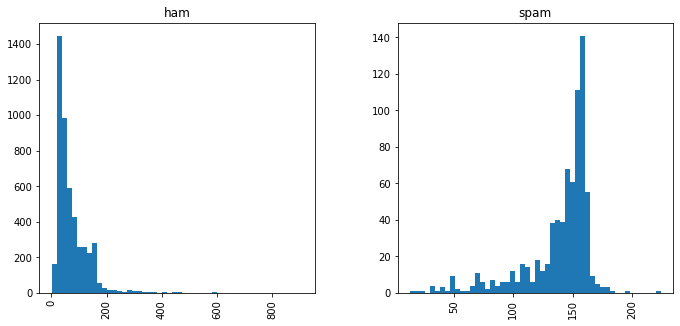

In [49]:
data.hist(column='length',by='label',bins=50,figsize=(11,5))

In [50]:
##Here more no of messages are lengthy in spam messages.
##Hence we can say more likely the message more likely it is spam


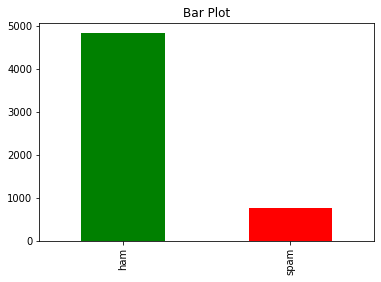

In [51]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

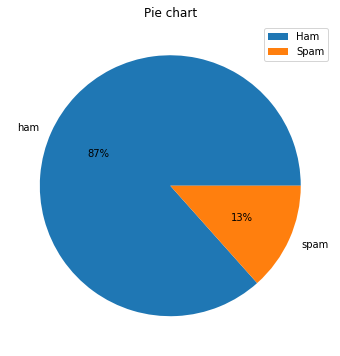

In [52]:
count_Class.plot(kind = 'pie',figsize=(6,6),autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.legend(["Ham","Spam"])
plt.show()

# Text Transformation
Data Cleaning(Removing Unimportant data/stopwords/Stemming)

In [53]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
import string
def cleanText(message):
    message=re.sub('[^a-zA-Z]',' ',message)
    message=message.lower()
    message=message.split()
    words=[ss.stem(word) for word in message if word not in stop]
    return " ".join(words)
data["message"]=data["message"].apply(cleanText)
data.head(n=10)

,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkt st m...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
5,spam,freemsg hey darl week word back like fun still...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea pri...,158
9,spam,mobil month u r entitl updat latest colour mob...,154


In [55]:
spam_messages=data[data["label"]=="spam"]["message"]
ham_messages=data[data["label"]=="ham"]["message"]

In [56]:
spam_words=[]
ham_words=[]

def extractSpamWords(spamMessages):
    global spam_words
    words=[word for word in word_tokenize(spamMessages)]
    spam_words=spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words=[word for word in word_tokenize(hamMessages)]
    ham_words=ham_words + words
    
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

In [57]:
from wordcloud import WordCloud

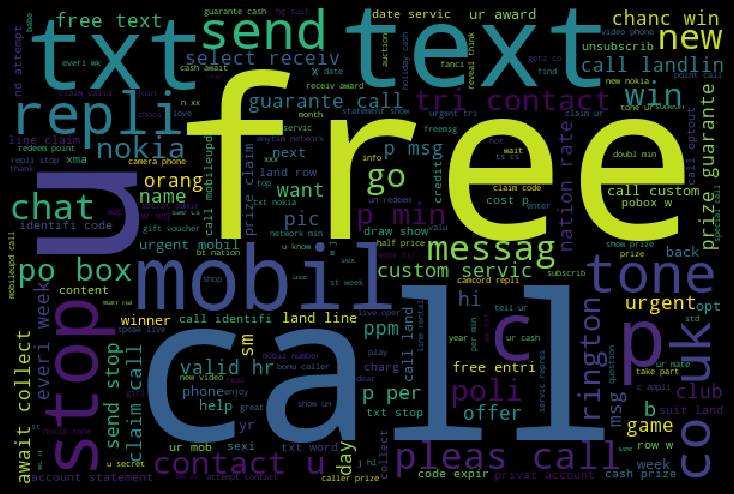

In [58]:
spam_wordcloud=WordCloud(width=600,height=400).generate(" ".join(spam_words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

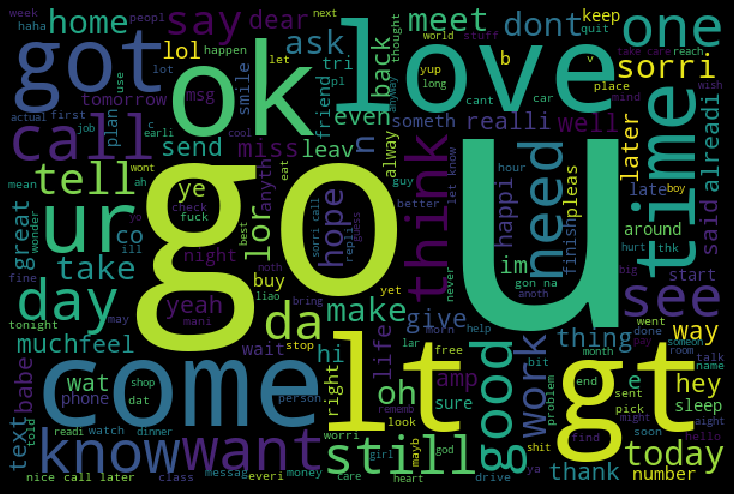

In [59]:
ham_wordcloud=WordCloud(width=600,height=400).generate(" ".join(ham_words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [60]:
def encodeCategory(cat):
    if cat=="spam":
        return 1
    else:
        return 0
data["label"]=data["label"].apply(encodeCategory)

In [61]:
data

,label,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkt st m...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,nd time tri contact u u pound prize claim easi...,161
5568,0,b go esplanad fr home,37
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(encoding="latin-1",strip_accents="unicode")
features=vec.fit_transform(data["message"]).toarray()
print(features.shape)

(5572, 6296)


In [63]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
features.shape

(5572, 6296)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit(data["message"])
X.vocabulary_

{'go': 2171,
 'jurong': 2827,
 'point': 4091,
 'crazi': 1169,
 'avail': 379,
 'bugi': 738,
 'great': 2245,
 'world': 6135,
 'la': 2932,
 'buffet': 736,
 'cine': 964,
 'got': 2208,
 'amor': 190,
 'wat': 5957,
 'ok': 3760,
 'lar': 2960,
 'joke': 2794,
 'wif': 6056,
 'oni': 3785,
 'free': 2007,
 'entri': 1673,
 'wkli': 6101,
 'comp': 1058,
 'win': 6067,
 'fa': 1791,
 'cup': 1220,
 'final': 1890,
 'tkt': 5536,
 'st': 5103,
 'may': 3276,
 'text': 5420,
 'receiv': 4402,
 'question': 4319,
 'std': 5131,
 'txt': 5695,
 'rate': 4364,
 'appli': 262,
 'dun': 1551,
 'say': 4651,
 'earli': 1568,
 'hor': 2477,
 'alreadi': 163,
 'nah': 3532,
 'think': 5468,
 'goe': 2175,
 'usf': 5811,
 'live': 3070,
 'around': 302,
 'though': 5485,
 'freemsg': 2013,
 'hey': 2408,
 'darl': 1267,
 'week': 5992,
 'word': 6129,
 'back': 414,
 'like': 3042,
 'fun': 2059,
 'still': 5152,
 'tb': 5367,
 'xxx': 6202,
 'chg': 922,
 'send': 4721,
 'rcv': 4375,
 'even': 1722,
 'brother': 710,
 'speak': 5037,
 'treat': 5638,
 'ai

In [66]:
y=data['label']

In [67]:
X=cv.fit_transform(data["message"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
df=pd.DataFrame(X,columns=cv.get_feature_names())
df
df['len']=data['length']
df

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada,len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,161
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125


In [69]:
y=data['label']


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3900, 6296), (1672, 6296)]


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score

In [72]:
#Multinomial
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print('Naive Bayes confusion_matrix: ')
print(confusion_matrix(y_pred, y_test))


0.9748803827751196
Naive Bayes confusion_matrix: 
[[1415    9]
 [  33  215]]


In [74]:
##SVM Classificaion
l_SVC=LinearSVC().fit(X_train,y_train)
y_lpred = l_SVC.predict(X_test)
print(accuracy_score(y_lpred,y_test))

0.9868421052631579


In [75]:
print('SVM confusion_matrix: ')
print(confusion_matrix(y_lpred, y_test))

SVM confusion_matrix: 
[[1445   19]
 [   3  205]]


In [36]:
##KNN Classification
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train,y_train)

y_kpred = knc.predict(X_test)

In [37]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_kpred))
print('KNeighbors confusion_matrix: ')
print(confusion_matrix(y_kpred,y_test))

KNeighbors Accuracy_score:  0.8953349282296651
KNeighbors confusion_matrix: 
[[1448  175]
 [   0   49]]


In [38]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train,y_train)
y_rpred = rfc.predict(X_test)

In [41]:
##Random Forest
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rpred))
print('Random Forest confusion_matrix: ')
print(confusion_matrix(y_rpred, y_test))

Random Forest Accuracy_score:  0.9778708133971292
Random Forest confusion_matrix: 
[[1448   37]
 [   0  187]]


In [45]:
##AdaBoost Classifier
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train,y_train)
y_abpred = abc.predict(X_test)

In [46]:
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abpred))
print('AdaBoost confusion_matrix: ')
print(confusion_matrix(y_abpred, y_test))

AdaBoost Accuracy_score:  0.9742822966507177
AdaBoost confusion_matrix: 
[[1435   30]
 [  13  194]]


In [2]:
##X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=100)
##model = LinearSVC().fit(X_train,y_train)

In [80]:
#saved_model=pickle.dumps(l_SVC)

In [48]:
#model_pickle=pickle.loads(saved_model)

In [49]:
#import joblib

In [50]:
#joblib.dump(l_SVC,'model.pkl')

In [51]:
#joblib.dump(X,'transform.pkl')

In [78]:
pickle.dump(l_SVC,open('modelfile.pkl','wb'))

In [79]:
pickle.dump(cv,open('transformfile.pkl','wb'))